In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime as dt
import yfinance as yf
sns.set_style('darkgrid')

In [111]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'NFLX', 'GOOGL']
end_date = dt.datetime(2023, 1, 1); start_date = end_date - dt.timedelta(days=4*365)
stock = yf.download(tickers, start=start_date, end=end_date)
stock.head()

C:\Users\sayak\AppData\Local\Temp\ipykernel_20036\2959137352.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


Price           Close                                                   High  \
Ticker           AAPL      GOOGL       MSFT        NFLX      NVDA       AAPL   
Date                                                                           
2019-01-02  37.617851  52.419628  94.945518  267.660004  3.377544  37.839387   
2019-01-03  33.870838  50.967827  91.452675  271.200012  3.173484  34.711713   
2019-01-04  35.316761  53.582150  95.706047  297.570007  3.376801  35.385843   
2019-01-07  35.238155  53.475292  95.828094  315.339996  3.555572  35.452545   
2019-01-08  35.909889  53.944973  96.522934  320.269989  3.467054  36.164774   

Price                                                   ...       Open  \
Ticker          GOOGL       MSFT        NFLX      NVDA  ...       AAPL   
Date                                                    ...              
2019-01-02  52.723307  95.537048  269.750000  3.433581  ...  36.896080   
2019-01-03  52.995169  94.072316  275.790009  3.351262  ...  34.297229   
2019-01-04  53.678075  96.250633  297.799988  3.414985  ...  34.428245   
2019-01-07  53.812268  96.964210  316.799988  3.592516  ...  35.421577   
2019-01-08  54.341593  97.621491  320.589996  3.639378  ...  35.626421   

Price                                                      Volume            \
Ticker          GOOGL       MSFT        NFLX      NVDA       AAPL     GOOGL   
Date                                                                          
2019-01-02  51.053819  93.471384  259.279999  3.239190  148158800  31868000   
2019-01-03  52.220317  93.987808  270.200012  3.317293  365248800  41960000   
2019-01-04  51.817233  93.630993  281.880005  3.246628  234428400  46022000   
2019-01-07  53.726286  95.433742  302.100006  3.434077  219111200  47446000   
2019-01-08  53.976283  96.748277  319.980011  3.637146  164101200  35414000   

Price                                      
Ticker          MSFT      NFLX       NVDA  
Date                                       
2019-01-02  35329300  11679500  508752000  
2019-01-03  42579100  14969600  705552000  
2019-01-04  44060600  19330100  585620000  
2019-01-07  35656100  18620100  709160000  
2019-01-08  31514400  15359200  786016000  

[5 rows x 25 columns]

In [112]:
close_prices = stock['Close']
log_returns = np.log(close_prices/close_prices.shift(1))
log_returns.dropna(inplace=True)
log_returns.head()

Ticker,AAPL,GOOGL,MSFT,NFLX,NVDA
Date,,,,,
2019-01-03,-0.104924,-0.028087,-0.037482,0.013139,-0.062319
2019-01-04,0.041803,0.050021,0.045460,0.092793,0.062099
2019-01-07,-0.002228,-0.001996,0.001274,0.058002,0.051587
2019-01-08,0.018883,0.008745,0.007225,0.015513,-0.025211
2019-01-09,0.016840,-0.003433,0.014198,-0.000968,0.019476


In [113]:
divmod(5,2)

(2, 1)

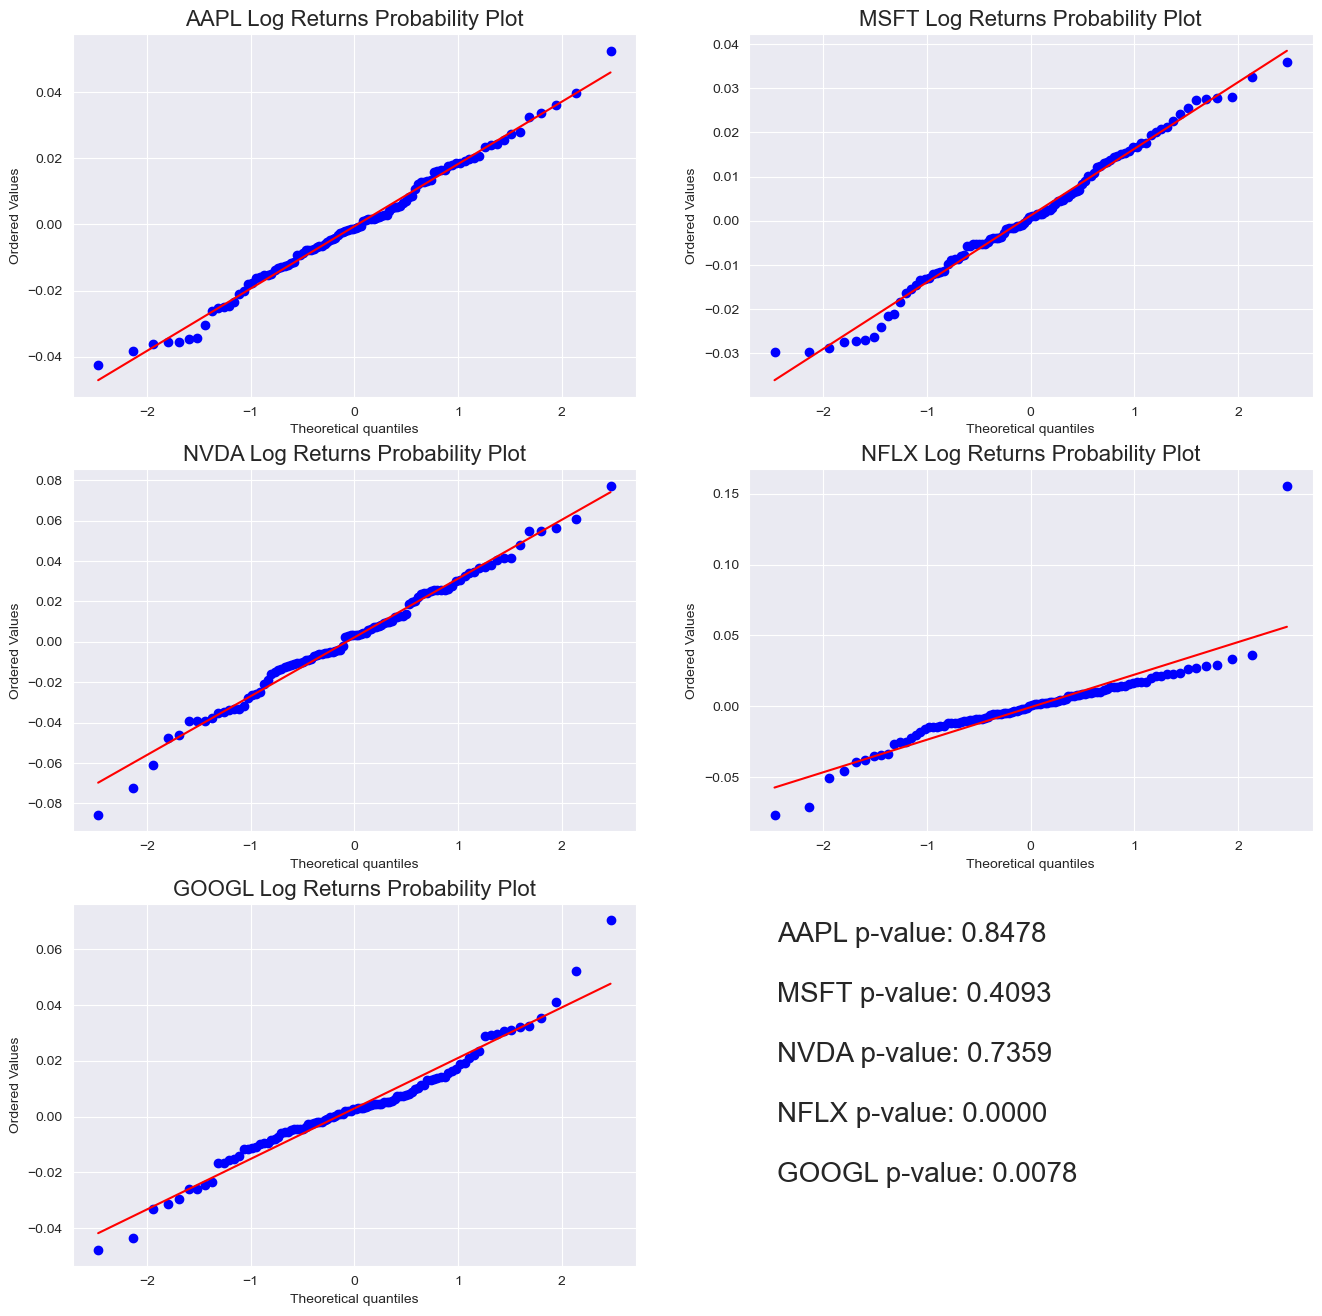

In [114]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021, 5, 31)
log_returns_1 = log_returns.loc[start:end]

fig, axes = plt.subplots(3, 2, figsize=(16, 16))

p_values =[]
for idx, ticker in enumerate(tickers):
    row, col = divmod(idx, 2)
    stats.probplot(log_returns_1[ticker].values, dist="norm",
                    plot=axes[row, col])
    axes[row, col].set_title(f"{ticker} Log Returns Probability Plot",
                              fontsize=16)
    axes[row,col].grid(True)

    test_stat, p_val = stats.shapiro(log_returns_1[ticker].values)
    p_values.append((ticker, p_val))

# Add p-values as text in the 6th subplot
axes[2, 1].axis('off')  # Hide axes
textstr = '\n\n'.join([f"{ticker} p-value: {p:.4f}" for ticker, p in p_values])
axes[2, 1].text(0.05, 0.95, textstr, fontsize=20, va='top')


plt.show()


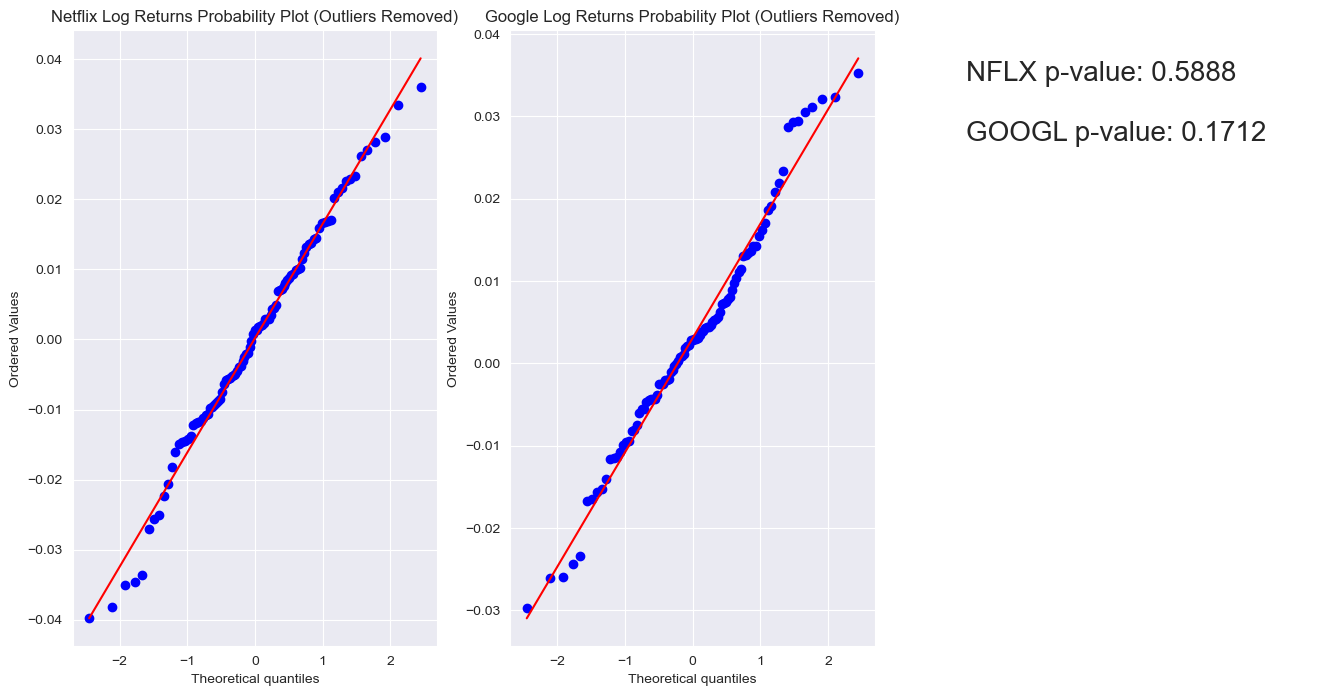

In [115]:
def remove_outlier(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    v1 = q1 - 1.5*iqr
    v2 = q3 + 1.5*iqr
    good_index = np.where((x>=v1) & (x<=v2))
    return(x[good_index])

nflx_out_rm = remove_outlier(log_returns_1[start:end]['NFLX'].values)
googl_out_rm = remove_outlier(log_returns_1[start:end]['GOOGL'].values)
fig, axs = plt.subplots(1, 3, figsize=(16, 8))

stats.probplot(nflx_out_rm, dist="norm", plot=axs[0])
axs[0].set_title("Netflix Log Returns Probability Plot (Outliers Removed)")
axs[0].grid(True)

stats.probplot(googl_out_rm, dist="norm", plot=axs[1])
axs[1].set_title("Google Log Returns Probability Plot (Outliers Removed)")
axs[1].grid(True)

p_val_out_rm = []
for ticker in ['NFLX', 'GOOGL']:
    x = remove_outlier(log_returns_1[start:end][ticker].values)
    test_stat, p = stats.shapiro(x)
    p_val_out_rm.append((ticker, p))

# Add p-values as text in the 6th subplot
axs[2].axis('off')  # Hide axes
textstr = '\n\n'.join([f"{ticker} p-value: {p:.4f}" for ticker, p in p_val_out_rm])
axs[2].text(0.05, 0.95, textstr, fontsize=20, va='top')

plt.show()

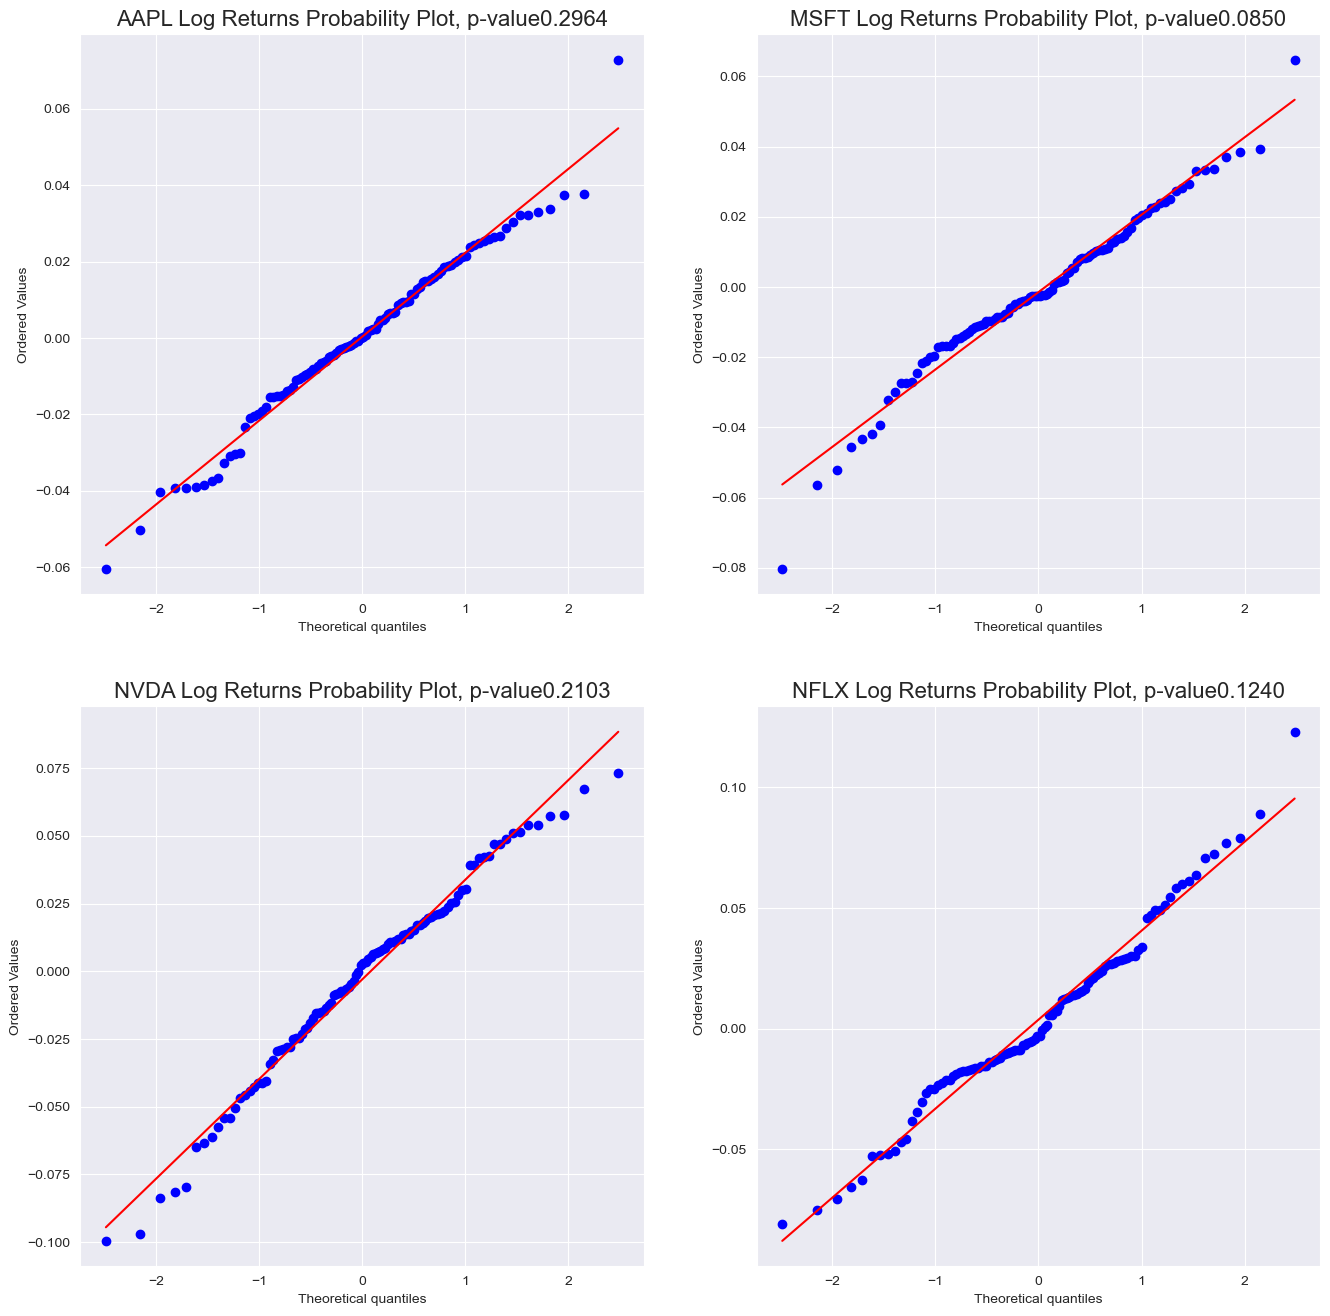

In [135]:
start = dt.datetime(2022, 6, 1)
end = dt.datetime(2022, 10, 31)
portfolio_tickers = ['AAPL', 'MSFT', 'NVDA', 'NFLX']
log_returns_2 = log_returns[portfolio_tickers].loc[start:end]

fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for idx, ticker in enumerate(portfolio_tickers):
    test_stat, p_val = stats.shapiro(log_returns_2[ticker].values)
    row, col = divmod(idx, 2)
    stats.probplot(log_returns_2[ticker].values, dist="norm",
                    plot=axes[row, col])
    axes[row, col].set_title(f"{ticker} Log Returns Probability Plot, p-value{p_val:.4f}",
                              fontsize=16)
    axes[row,col].grid(True)

    
    p_values.append((ticker, p_val))

plt.show()


In [138]:
# Distribution of daily log-return with the low risk protfolio:
wt = np.array([0.2655, 0.6377, 0, 0.0968]) # in the order of AAPL, MSFT, NVDA, NFLX

print(log_returns_2.sum(axis=0))

wt_log_returns = np.dot(log_returns_2, wt)

print(stats.shapiro(wt_log_returns))

Ticker
AAPL    0.031174
MSFT   -0.155906
NVDA   -0.324049
NFLX    0.390908
dtype: float64
ShapiroResult(statistic=0.9902054667472839, pvalue=0.6421202421188354)


In [139]:
wt = np.array([0.05, 0.6168, 0.2832, 0.05]) # in the order of AAPL, MSFT, NVDA, NFLX

print(log_returns_2.sum(axis=0))

wt_log_returns = np.dot(log_returns_2, wt)

print(stats.shapiro(wt_log_returns))

Ticker
AAPL    0.031174
MSFT   -0.155906
NVDA   -0.324049
NFLX    0.390908
dtype: float64
ShapiroResult(statistic=0.9872293472290039, pvalue=0.4104723632335663)
